# Import Library
---

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
sns.set_style('whitegrid')

# data preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import mutual_info_regression

# regression model
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

# classification model
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [2]:
random_state = 0
test_size = 0.2
scaler = MinMaxScaler()
encoder = OrdinalEncoder()

# Data loading
---

In [3]:
url = 'https://raw.githubusercontent.com/twiradinata/datasets/main/property_surabaya.csv'
df = pd.read_csv(url, sep=';')
df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0  Northwest Lake            72             69         2          2       2   
1     Bukit Palma            60             90         3          2       2   
2  Palma Classica           210            100         4          2       1   
3     Bukit Palma           120             54         3          1       1   
4     Bukit Palma            60             90         3          2       2   

   community_price       price                        ownership_status  \
0       1400000000  1350000000                 Hak Guna Bangunan (HGB)   
1       1000000000  1125000000  Pengikatan Perjanjian Jual Beli (PPJB)   
2       2400000000  1999000000                         Hak Milik (SHM)   
3        800000000   850000000                         Hak Milik (SHM)   
4        800000000  1025000000                 Hak Guna Bangunan (HGB)   

    facing house_position road_width urgent  building_age ready_to_use  \
0  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
1  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
2    Utara       Standard  > 2 Mobil    Yes  5 - 10 Tahun          Yes   
3  Selatan       Standard  > 2 Mobil     No    > 10 Tahun           No   
4  Selatan       Standard  > 2 Mobil     No   1 - 4 Tahun          Yes   

  furnished  category pricing_category  
0        No   Premium      Over Priced  
1        No  Standard      Over Priced  
2        No  Standard     Normal Price  
3        No  Standard     Under Priced  
4        No  Standard      Over Priced

##### Get dataset information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   cluster_name      490 non-null    object
 1   surface_area      490 non-null    int64 
 2   building_area     490 non-null    int64 
 3   bedrooms          490 non-null    int64 
 4   bathrooms         490 non-null    int64 
 5   storey            490 non-null    int64 
 6   community_price   490 non-null    int64 
 7   price             490 non-null    int64 
 8   ownership_status  490 non-null    object
 9   facing            490 non-null    object
 10  house_position    490 non-null    object
 11  road_width        490 non-null    object
 12  urgent            480 non-null    object
 13  building_age      448 non-null    object
 14  ready_to_use      490 non-null    object
 15  furnished         490 non-null    object
 16  category          490 non-null    object
 17  pricing_category

In [5]:
df.describe()

surface_area  building_area    bedrooms   bathrooms      storey  \
count    490.000000     490.000000  490.000000  490.000000  490.000000   
mean     210.679592     241.763265    4.197959    3.265306    1.877551   
std      204.129939     238.778138    2.155413    2.093671    0.512927   
min       35.000000      32.000000    0.000000    1.000000    1.000000   
25%       96.250000     110.000000    3.000000    2.000000    2.000000   
50%      155.000000     178.500000    4.000000    3.000000    2.000000   
75%      240.000000     280.000000    5.000000    4.000000    2.000000   
max     2000.000000    2000.000000   36.000000   36.000000    4.000000   

       community_price         price  
count     4.900000e+02  4.900000e+02  
mean      4.418763e+09  4.506184e+09  
std       7.785302e+09  7.623816e+09  
min       3.000000e+08  3.000000e+08  
25%       1.500000e+09  1.400000e+09  
50%       2.500000e+09  2.550000e+09  
75%       4.500000e+09  4.300000e+09  
max       1.200000e+11  1.050000e+11

In [6]:
print(f'The data has {df.shape[0]} record and {df.shape[1]} features')

The data has 490 record and 18 features


##### Checking for missing value and display column with missing value

In [7]:
print('Total missing value in the dataframe:', df.isnull().sum().sum())

Total missing value in the dataframe: 91


In [8]:
col_with_missing = [col for col in df.columns if df[col].isnull().any()]
print('Column with missing value:')
print(df[col_with_missing].isnull().sum())

Column with missing value:
urgent              10
building_age        42
pricing_category    39
dtype: int64


# Exploratory data analysis
---

The dataset contains 490 row and 18 column with following information:
* cluster_name - name of the cluster for the house (object)
* surface_area - the amount of area (int)
* building_area - the amount of area taken for the house (int)
* bedrooms - total bedroom on the house (int)
* bathrooms - total bathroom on the house (int)
* storey - total story on the house (int)
* community_price - house prices posted in the community (int)
* price - house prices (int)
* ownership_status - who own the house (object)
* facing - where the house faced (object)
* house_position - position of the house in the category (object)
* road_width - total number of cars that fit on the road house (object)
* urgent - is it urgent when selling the house (object)
* building_age - age of the house (object)
* ready_to_use - is the house ready to use (object)
* furnished - is the house already furnished (object)
* category - house category (object)
* pricing_category - category of price (object)

In [9]:
def cluster_normalizer(temp_df):
    """
    This function normalize cluster name from a dataframe.
    
    Parameters
    ----------
    temp_df: pandas dataframe
    
    Returns
    ----------
    temp_df: normalized cluster name
    """
    
    temp_df['cluster_name'] = temp_df['cluster_name'].apply(str.lower)
    temp_df.loc[temp_df['cluster_name'].str.contains('palma'), 'cluster_name'] = 'bukit palma'
    temp_df.loc[temp_df['cluster_name'].str.contains('citraland'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('woodland'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('fullerton'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('northwest'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('wisata bukit'), 'cluster_name'] = 'wisata bukit mas'
    temp_df.loc[temp_df['cluster_name'].str.contains('darmo permai'), 'cluster_name'] = 'darmo permai'
    temp_df.loc[temp_df['cluster_name'].str.contains('darmo baru'), 'cluster_name'] = 'darmo'
    temp_df.loc[temp_df['cluster_name'].str.contains('darmo indah'), 'cluster_name'] = 'darmo'
    temp_df.loc[temp_df['cluster_name'].str.contains('sutorejo'), 'cluster_name'] = 'sutorejo'
    temp_df.loc[temp_df['cluster_name'].str.contains('royal park'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('graha fam'), 'cluster_name'] = 'graha famili'
    temp_df.loc[temp_df['cluster_name'].str.contains('graha natura'), 'cluster_name'] = 'graha natura'
    temp_df.loc[temp_df['cluster_name'] == 'graha', 'cluster_name'] = 'graha famili'
    temp_df.loc[temp_df['cluster_name'].str.contains('pakuwon in'), 'cluster_name'] = 'pakuwon indah'
    temp_df.loc[temp_df['cluster_name'].str.contains('ploso'), 'cluster_name'] = 'ploso'
    temp_df.loc[temp_df['cluster_name'].str.contains('puri sur'), 'cluster_name'] = 'puri surya'
    temp_df.loc[temp_df['cluster_name'].str.contains('tenggilis'), 'cluster_name'] = 'tenggilis'
    temp_df.loc[temp_df['cluster_name'].str.contains('pelican'), 'cluster_name'] = 'bukit palma'
    temp_df.loc[temp_df['cluster_name'].str.contains('simpang'), 'cluster_name'] = 'darmo permai'
    temp_df.loc[temp_df['cluster_name'].str.contains('darmo harapan'), 'cluster_name'] = 'darmo'
    temp_df.loc[temp_df['cluster_name'].str.contains('dukuh kupang'), 'cluster_name'] = 'dukuh kupang'
    temp_df.loc[temp_df['cluster_name'].str.contains('pakuwon city'), 'cluster_name'] = 'pakuwon city'
    temp_df.loc[temp_df['cluster_name'].str.contains('villa valensia'), 'cluster_name'] = 'vila valensia'
    temp_df.loc[temp_df['cluster_name'].str.contains('dian istana'), 'cluster_name'] = 'dian istana'
    temp_df.loc[temp_df['cluster_name'].str.contains('pondok mari'), 'cluster_name'] = 'pondok maritim'
    temp_df.loc[temp_df['cluster_name'].str.contains('manyar'), 'cluster_name'] = 'manyar'
    temp_df.loc[temp_df['cluster_name'] == 'pakuwon', 'cluster_name'] = 'pakuwon indah'
    temp_df.loc[temp_df['cluster_name'].str.contains('lebak'), 'cluster_name'] = 'lebak'
    temp_df.loc[temp_df['cluster_name'].str.contains('kertajaya'), 'cluster_name'] = 'kertajaya'
    temp_df.loc[temp_df['cluster_name'].str.contains('pondok c'), 'cluster_name'] = 'pondok chandra'
    temp_df.loc[temp_df['cluster_name'].str.contains('rungkut'), 'cluster_name'] = 'rungkut'
    temp_df.loc[temp_df['cluster_name'].str.contains('medokan'), 'cluster_name'] = 'medokan'
    temp_df.loc[temp_df['cluster_name'].str.contains('koala'), 'cluster_name'] = 'medokan'
    temp_df.loc[temp_df['cluster_name'].str.contains('aries'), 'cluster_name'] = 'pakal'
    temp_df.loc[temp_df['cluster_name'].str.contains('dharma'), 'cluster_name'] = 'dharmahusada'
    temp_df.loc[temp_df['cluster_name'].str.contains('kutisari'), 'cluster_name'] = 'kutisari'
    temp_df.loc[temp_df['cluster_name'].str.contains('mulyosari'), 'cluster_name'] = 'mulyosari'
    temp_df.loc[temp_df['cluster_name'].str.contains('siwalan'), 'cluster_name'] = 'siwalankerto'
    temp_df.loc[temp_df['cluster_name'].str.contains('pantai'), 'cluster_name'] = 'pantai mentari'
    temp_df.loc[temp_df['cluster_name'].str.contains('klam'), 'cluster_name'] = 'klampis'
    temp_df.loc[temp_df['cluster_name'].str.contains('galaxy bumi'), 'cluster_name'] = 'galaxy bumi'
    temp_df.loc[temp_df['cluster_name'].str.contains('araya'), 'cluster_name'] = 'semolowaru'
    temp_df.loc[temp_df['cluster_name'].str.contains('nirwana'), 'cluster_name'] = 'pondok nirwana'
    temp_df.loc[temp_df['cluster_name'].str.contains('keputih'), 'cluster_name'] = 'keputih'
    temp_df.loc[temp_df['cluster_name'].str.contains('bumi marina'), 'cluster_name'] = 'keputih'
    temp_df.loc[temp_df['cluster_name'].str.contains('sukolilo'), 'cluster_name'] = 'keputih'
    temp_df.loc[temp_df['cluster_name'].str.contains('mojok'), 'cluster_name'] = 'mojoklanggru'
    temp_df.loc[temp_df['cluster_name'].str.contains('wiguna'), 'cluster_name'] = 'wiguna'
    temp_df.loc[temp_df['cluster_name'].str.contains('dukuh setro'), 'cluster_name'] = 'wonorejo'
    temp_df.loc[temp_df['cluster_name'].str.contains('green semangi'), 'cluster_name'] = 'wonorejo'
    temp_df.loc[temp_df['cluster_name'].str.contains('pakuwon square'), 'cluster_name'] = 'pakuwon indah'
    temp_df.loc[temp_df['cluster_name'].str.contains('tambak'), 'cluster_name'] = 'tambaksari'
    temp_df.loc[temp_df['cluster_name'].str.contains('lebak'), 'cluster_name'] = 'tambaksari'
    temp_df.loc[temp_df['cluster_name'].str.contains('menteng'), 'cluster_name'] = 'lakarsantri'
    temp_df.loc[temp_df['cluster_name'].str.contains('menganti'), 'cluster_name'] = 'menganti'
    temp_df.loc[temp_df['cluster_name'].str.contains('greenlake'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('taman puspa raya'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('selat golf'), 'cluster_name'] = 'citraland'
    temp_df.loc[temp_df['cluster_name'].str.contains('bayleaf'), 'cluster_name'] = 'menganti'
    temp_df.loc[temp_df['cluster_name'].str.contains('prapen'), 'cluster_name'] = 'tenggilis'
    temp_df.loc[temp_df['cluster_name'].str.contains('taman pondok'), 'cluster_name'] = 'lakarsantri'
    temp_df.loc[temp_df['cluster_name'].str.contains('de casa'), 'cluster_name'] = 'lakarsantri'
    temp_df.loc[temp_df['cluster_name'].str.contains('puri saf'), 'cluster_name'] = 'menganti'
    temp_df.loc[temp_df['cluster_name'].str.contains('lidah'), 'cluster_name'] = 'lidah kulon'
    temp_df.loc[temp_df['cluster_name'].str.contains('twr'), 'cluster_name'] = 'menganti'
    temp_df.loc[temp_df['cluster_name'].str.contains('forest'), 'cluster_name'] = 'menganti'
    temp_df.loc[temp_df['cluster_name'].str.contains('panjang'), 'cluster_name'] = 'rungkut'
    temp_df.loc[temp_df['cluster_name'].str.contains('semolo'), 'cluster_name'] = 'semolowaru'
    temp_df.loc[temp_df['cluster_name'].str.contains('kali'), 'cluster_name'] = 'kalijudan'
    temp_df.loc[temp_df['cluster_name'].str.contains('wono'), 'cluster_name'] = 'wonorejo'
    temp_df.loc[temp_df['cluster_name'].str.contains('bukit darmo'), 'cluster_name'] = 'bukit golf'
    temp_df.loc[temp_df['cluster_name'].str.contains('amerta'), 'cluster_name'] = 'wonorejo'
    temp_df.loc[temp_df['cluster_name'].str.contains('gayung'), 'cluster_name'] = 'gayungsari'
    temp_df.loc[temp_df['cluster_name'].str.contains('darma'), 'cluster_name'] = 'dharmahusada'
    temp_df.loc[temp_df['cluster_name'].str.contains('tj'), 'cluster_name'] = 'pondok chandra'
    temp_df.loc[temp_df['cluster_name'].str.contains('gunung'), 'cluster_name'] = 'gunung anyar'
    temp_df.loc[temp_df['cluster_name'].str.contains('sidoarjo'), 'cluster_name'] = 'sidoarjo'
    return temp_df

In [10]:
# dropping the missing value for exploratory purposes
explore_df = df.dropna().drop(['community_price'], axis=1)
explore_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0  Northwest Lake            72             69         2          2       2   
1     Bukit Palma            60             90         3          2       2   
2  Palma Classica           210            100         4          2       1   
3     Bukit Palma           120             54         3          1       1   
4     Bukit Palma            60             90         3          2       2   

        price                        ownership_status   facing house_position  \
0  1350000000                 Hak Guna Bangunan (HGB)  Selatan       Standard   
1  1125000000  Pengikatan Perjanjian Jual Beli (PPJB)  Selatan       Standard   
2  1999000000                         Hak Milik (SHM)    Utara       Standard   
3   850000000                         Hak Milik (SHM)  Selatan       Standard   
4  1025000000                 Hak Guna Bangunan (HGB)  Selatan       Standard   

  road_width urgent  building_age ready_to_use furnished  category  \
0  1-2 Mobil     No   1 - 4 Tahun          Yes        No   Premium   
1  1-2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   
2  > 2 Mobil    Yes  5 - 10 Tahun          Yes        No  Standard   
3  > 2 Mobil     No    > 10 Tahun           No        No  Standard   
4  > 2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   

  pricing_category  
0      Over Priced  
1      Over Priced  
2     Normal Price  
3     Under Priced  
4      Over Priced

In [11]:
explore_df['price'] = explore_df['price'].apply(lambda x: x / 1000000)
explore_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0  Northwest Lake            72             69         2          2       2   
1     Bukit Palma            60             90         3          2       2   
2  Palma Classica           210            100         4          2       1   
3     Bukit Palma           120             54         3          1       1   
4     Bukit Palma            60             90         3          2       2   

    price                        ownership_status   facing house_position  \
0  1350.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   
1  1125.0  Pengikatan Perjanjian Jual Beli (PPJB)  Selatan       Standard   
2  1999.0                         Hak Milik (SHM)    Utara       Standard   
3   850.0                         Hak Milik (SHM)  Selatan       Standard   
4  1025.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   

  road_width urgent  building_age ready_to_use furnished  category  \
0  1-2 Mobil     No   1 - 4 Tahun          Yes        No   Premium   
1  1-2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   
2  > 2 Mobil    Yes  5 - 10 Tahun          Yes        No  Standard   
3  > 2 Mobil     No    > 10 Tahun           No        No  Standard   
4  > 2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   

  pricing_category  
0      Over Priced  
1      Over Priced  
2     Normal Price  
3     Under Priced  
4      Over Priced

In [12]:
explore_df = cluster_normalizer(explore_df)
explore_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

    price                        ownership_status   facing house_position  \
0  1350.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   
1  1125.0  Pengikatan Perjanjian Jual Beli (PPJB)  Selatan       Standard   
2  1999.0                         Hak Milik (SHM)    Utara       Standard   
3   850.0                         Hak Milik (SHM)  Selatan       Standard   
4  1025.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   

  road_width urgent  building_age ready_to_use furnished  category  \
0  1-2 Mobil     No   1 - 4 Tahun          Yes        No   Premium   
1  1-2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   
2  > 2 Mobil    Yes  5 - 10 Tahun          Yes        No  Standard   
3  > 2 Mobil     No    > 10 Tahun           No        No  Standard   
4  > 2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   

  pricing_category  
0      Over Priced  
1      Over Priced  
2     Normal Price  
3     Under Priced  
4      Over Priced

In [13]:
# define the numerical and categorical feature for visualization
numerical_features = [col for col in explore_df.columns if df[col].dtype != object]
categorical_features = [col for col in explore_df.columns if df[col].dtype == object]

##### Univariate Analysis

In [14]:
def visualize_outlier(axs, features, index, label, title):
    """
    This function visualize feature with boxplot.
    
    Parameters
    ----------
    axs: matplotlib axis
    features: feature component that want to be visualize
    index: matplotlib index axis
    label: label for the y axis
    title: title of the subplot
    
    Returns
    ----------
    None
    """
    
    ax = axs[index]
    ax.set_xlabel(features)
    ax.set_ylabel(label)
    ax.set(title=title)
    sns.boxplot(data=explore_df[features], ax=axs[index])

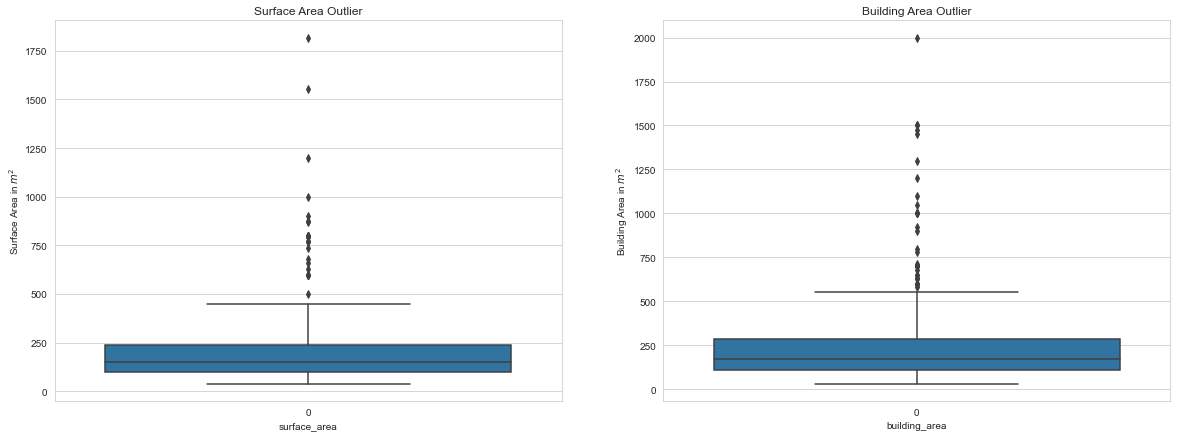

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(20, 7))

index = 0
label = r'Surface Area in $m^2$'
title = 'Surface Area Outlier'
visualize_outlier(axs, numerical_features[0], index, label, title)

index = 1
label = r'Building Area in $m^2$'
title = 'Building Area Outlier'
visualize_outlier(axs, numerical_features[1], index, label, title)

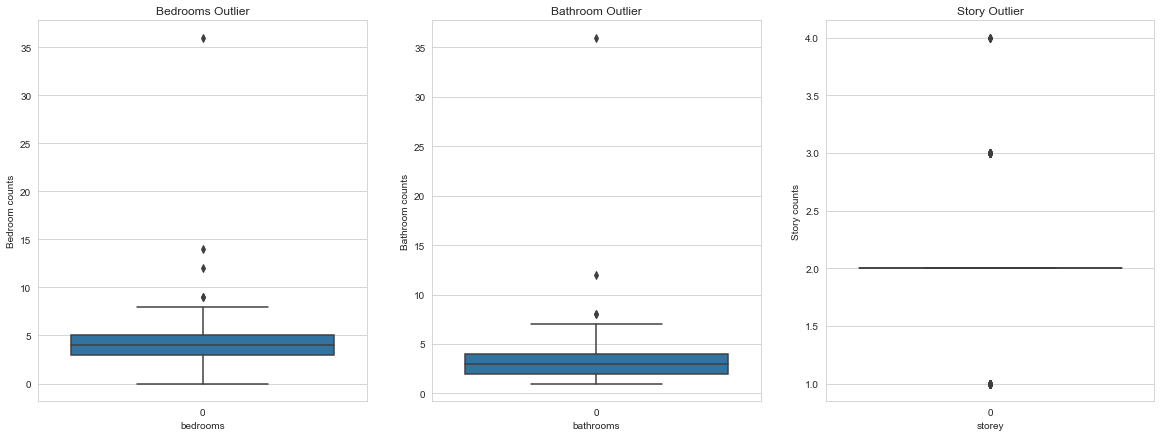

In [16]:
fig, axs = plt.subplots(1, 3, figsize=(20, 7))

index = 0
label = r'Bedroom counts'
title = 'Bedrooms Outlier'
visualize_outlier(axs, numerical_features[2], index, label, title)

index = 1
label = r'Bathroom counts'
title = 'Bathroom Outlier'
visualize_outlier(axs, numerical_features[3], index, label, title)

index = 2
label = r'Story counts'
title = 'Story Outlier'
visualize_outlier(axs, numerical_features[4], index, label, title)

Text(0.5, 1.0, 'Real Price Outlier')

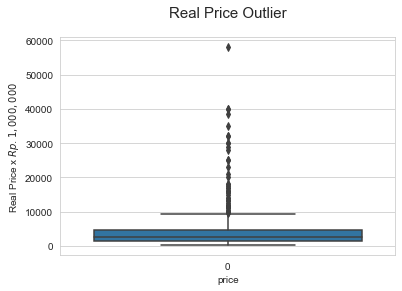

In [17]:
label = r'Real Price x $Rp. 1,000,000$'
title = 'Real Price Outlier'
sns.boxplot(data=explore_df[numerical_features[5]])
plt.xlabel(numerical_features[5])
plt.ylabel(label)
plt.title(title, pad=20, fontsize=15)

##### Bivariate Analysis

In [18]:
explore_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

    price                        ownership_status   facing house_position  \
0  1350.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   
1  1125.0  Pengikatan Perjanjian Jual Beli (PPJB)  Selatan       Standard   
2  1999.0                         Hak Milik (SHM)    Utara       Standard   
3   850.0                         Hak Milik (SHM)  Selatan       Standard   
4  1025.0                 Hak Guna Bangunan (HGB)  Selatan       Standard   

  road_width urgent  building_age ready_to_use furnished  category  \
0  1-2 Mobil     No   1 - 4 Tahun          Yes        No   Premium   
1  1-2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   
2  > 2 Mobil    Yes  5 - 10 Tahun          Yes        No  Standard   
3  > 2 Mobil     No    > 10 Tahun           No        No  Standard   
4  > 2 Mobil     No   1 - 4 Tahun          Yes        No  Standard   

  pricing_category  
0      Over Priced  
1      Over Priced  
2     Normal Price  
3     Under Priced  
4      Over Priced

<AxesSubplot:title={'center':'Building Area vs House Price'}, xlabel='Building Area in $m^2$', ylabel='House Price in IDR x Rp. 1,000,000'>

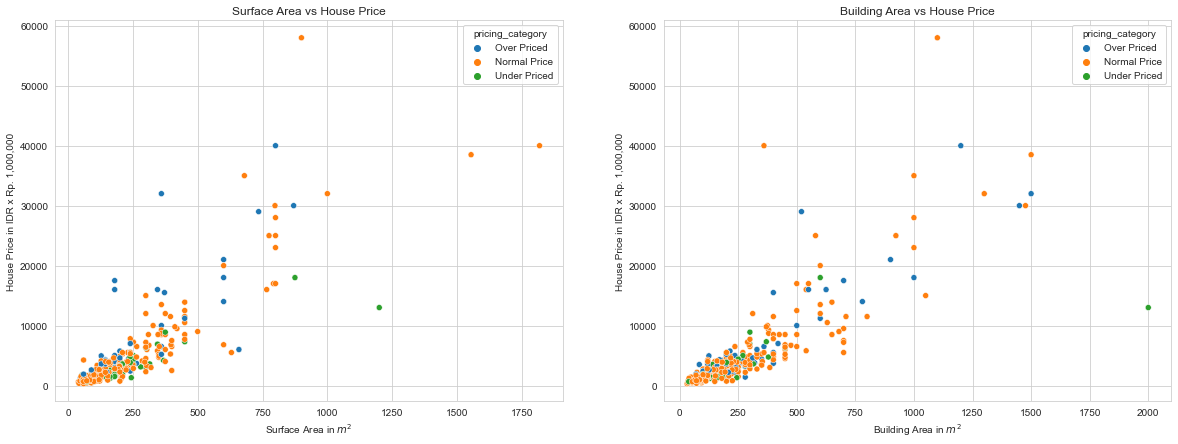

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(20,7))

ax = axs[0]
ax.set_xlabel(r'Surface Area in $m^2$')
ax.set_ylabel('House Price in IDR x Rp. 1,000,000')
ax.set(title='Surface Area vs House Price')
sns.scatterplot(data=explore_df, x='surface_area', y='price', hue='pricing_category', ax=axs[0])

ax = axs[1]
ax.set_xlabel(r'Building Area in $m^2$')
ax.set_ylabel('House Price in IDR x Rp. 1,000,000')
ax.set(title='Building Area vs House Price')
sns.scatterplot(data=explore_df, x='building_area', y='price', hue='pricing_category', ax=axs[1])

<AxesSubplot:title={'center':'Story Counts vs House Price'}, xlabel='Story counts', ylabel='House Price in IDR x Rp. 1,000,000'>

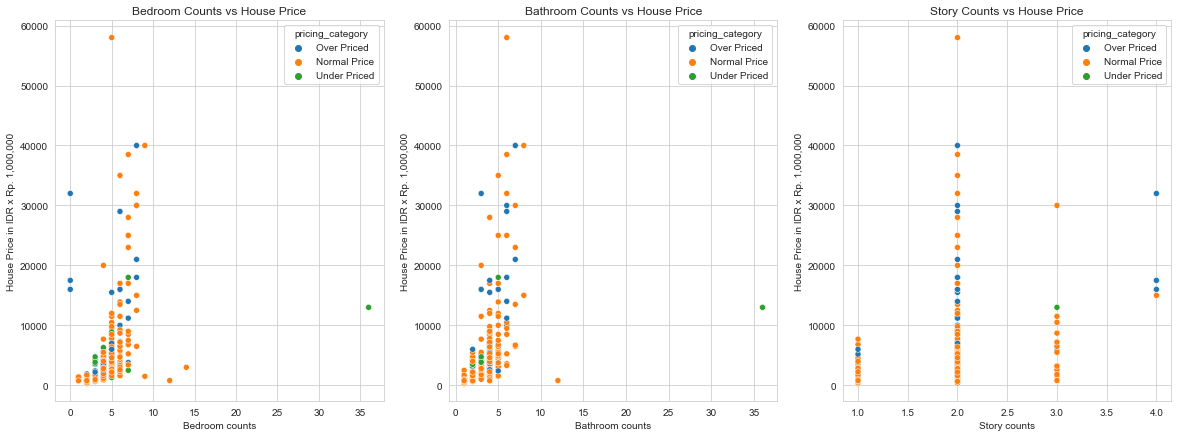

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(20,7))

ax = axs[0]
ax.set_xlabel(r'Bedroom counts')
ax.set_ylabel('House Price in IDR x Rp. 1,000,000')
ax.set(title='Bedroom Counts vs House Price')
sns.scatterplot(data=explore_df, x='bedrooms', y='price', hue='pricing_category', ax=axs[0])

ax = axs[1]
ax.set_xlabel(r'Bathroom counts')
ax.set_ylabel('House Price in IDR x Rp. 1,000,000')
ax.set(title='Bathroom Counts vs House Price')
sns.scatterplot(data=explore_df, x='bathrooms', y='price', hue='pricing_category', ax=axs[1])

ax = axs[2]
ax.set_xlabel(r'Story counts')
ax.set_ylabel('House Price in IDR x Rp. 1,000,000')
ax.set(title='Story Counts vs House Price')
sns.scatterplot(data=explore_df, x='storey', y='price', hue='pricing_category', ax=axs[2])

##### Multivariate Analysis

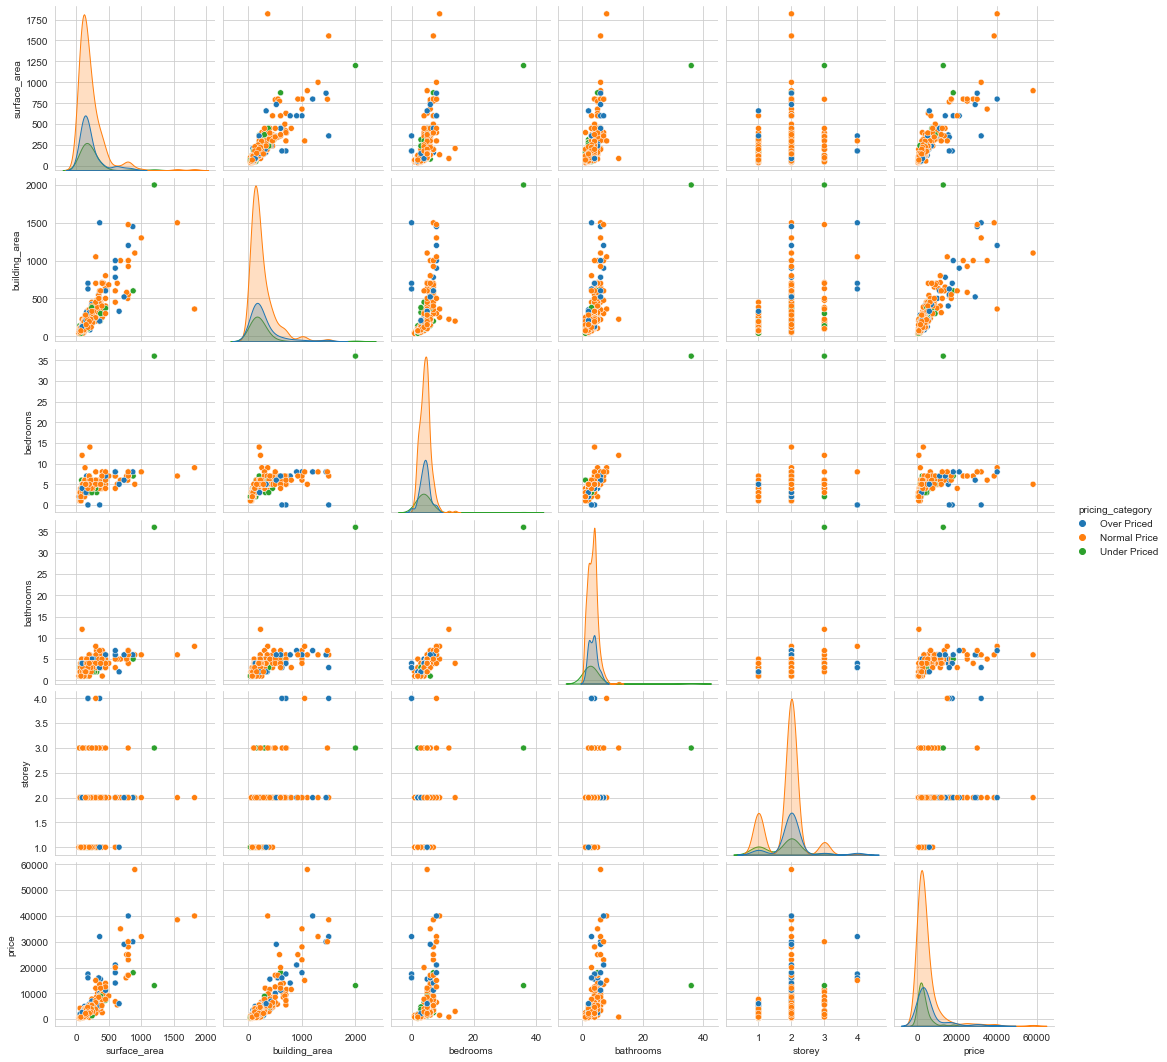

In [21]:
sns.pairplot(data=explore_df, hue='pricing_category')

Text(0.5, 1.0, 'Correlation matrix for numerical features')

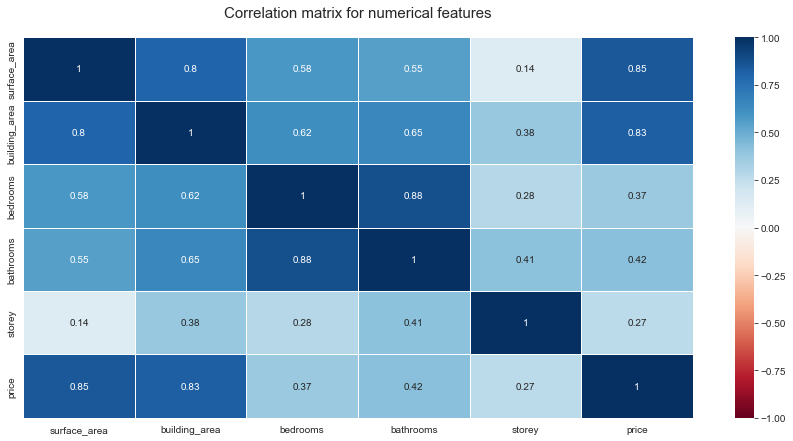

In [22]:
plt.figure(figsize=(15,7))
corr = explore_df[numerical_features].corr()
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='RdBu', linewidth=1)
plt.title('Correlation matrix for numerical features', size=15, pad=20)

##### Categorical Analysis

In [23]:
cluster_dist = explore_df['cluster_name'].value_counts().sort_values(ascending=False)[:20]
ownership_dist = explore_df['ownership_status'].value_counts().sort_values(ascending=False)
facing_dist = explore_df['facing'].value_counts().sort_values(ascending=False)
house_position_dist = explore_df['house_position'].value_counts().sort_values(ascending=False)
road_width_dist = explore_df['road_width'].value_counts().sort_values(ascending=False)
urgent_dist = explore_df['urgent'].value_counts().sort_values(ascending=False)
building_age_dist = explore_df['building_age'].value_counts().sort_values(ascending=False)
ready_to_use_dist = explore_df['ready_to_use'].value_counts().sort_values(ascending=False)
furnished_dist = explore_df['furnished'].value_counts().sort_values(ascending=False)
category_dist = explore_df['ready_to_use'].value_counts().sort_values(ascending=False)
pricing_category_dist = explore_df['pricing_category'].value_counts().sort_values(ascending=False)

In [24]:
def plotly_dist(data):
    labels = data.index
    values = data.values
    fig = go.Figure(data=[
        go.Pie(
            labels=labels, 
            values=values, 
            textinfo='label+value', 
            insidetextorientation='radial',
        )
    ])
    fig.show()

In [25]:
# cluster name
plotly_dist(cluster_dist)

In [26]:
# ownership
plotly_dist(ownership_dist)

In [27]:
# house facing
plotly_dist(facing_dist)

In [28]:
# house position
plotly_dist(house_position_dist)

In [29]:
# road width
plotly_dist(road_width_dist)

In [30]:
# building age
plotly_dist(building_age_dist)

In [31]:
# ready to use
plotly_dist(ready_to_use_dist)

In [32]:
# furnished
plotly_dist(furnished_dist)

In [33]:
# category
plotly_dist(category_dist)

In [34]:
# pricing category
plotly_dist(pricing_category_dist)

# Data Preparation
---

In [35]:
df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0  Northwest Lake            72             69         2          2       2   
1     Bukit Palma            60             90         3          2       2   
2  Palma Classica           210            100         4          2       1   
3     Bukit Palma           120             54         3          1       1   
4     Bukit Palma            60             90         3          2       2   

   community_price       price                        ownership_status  \
0       1400000000  1350000000                 Hak Guna Bangunan (HGB)   
1       1000000000  1125000000  Pengikatan Perjanjian Jual Beli (PPJB)   
2       2400000000  1999000000                         Hak Milik (SHM)   
3        800000000   850000000                         Hak Milik (SHM)   
4        800000000  1025000000                 Hak Guna Bangunan (HGB)   

    facing house_position road_width urgent  building_age ready_to_use  \
0  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
1  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
2    Utara       Standard  > 2 Mobil    Yes  5 - 10 Tahun          Yes   
3  Selatan       Standard  > 2 Mobil     No    > 10 Tahun           No   
4  Selatan       Standard  > 2 Mobil     No   1 - 4 Tahun          Yes   

  furnished  category pricing_category  
0        No   Premium      Over Priced  
1        No  Standard      Over Priced  
2        No  Standard     Normal Price  
3        No  Standard     Under Priced  
4        No  Standard      Over Priced

In [36]:
df = cluster_normalizer(df)
df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

   community_price       price                        ownership_status  \
0       1400000000  1350000000                 Hak Guna Bangunan (HGB)   
1       1000000000  1125000000  Pengikatan Perjanjian Jual Beli (PPJB)   
2       2400000000  1999000000                         Hak Milik (SHM)   
3        800000000   850000000                         Hak Milik (SHM)   
4        800000000  1025000000                 Hak Guna Bangunan (HGB)   

    facing house_position road_width urgent  building_age ready_to_use  \
0  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
1  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
2    Utara       Standard  > 2 Mobil    Yes  5 - 10 Tahun          Yes   
3  Selatan       Standard  > 2 Mobil     No    > 10 Tahun           No   
4  Selatan       Standard  > 2 Mobil     No   1 - 4 Tahun          Yes   

  furnished  category pricing_category  
0        No   Premium      Over Priced  
1        No  Standard      Over Priced  
2        No  Standard     Normal Price  
3        No  Standard     Under Priced  
4        No  Standard      Over Priced

##### Drop missing value

In [37]:
df = df.dropna()
df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

   community_price       price                        ownership_status  \
0       1400000000  1350000000                 Hak Guna Bangunan (HGB)   
1       1000000000  1125000000  Pengikatan Perjanjian Jual Beli (PPJB)   
2       2400000000  1999000000                         Hak Milik (SHM)   
3        800000000   850000000                         Hak Milik (SHM)   
4        800000000  1025000000                 Hak Guna Bangunan (HGB)   

    facing house_position road_width urgent  building_age ready_to_use  \
0  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
1  Selatan       Standard  1-2 Mobil     No   1 - 4 Tahun          Yes   
2    Utara       Standard  > 2 Mobil    Yes  5 - 10 Tahun          Yes   
3  Selatan       Standard  > 2 Mobil     No    > 10 Tahun           No   
4  Selatan       Standard  > 2 Mobil     No   1 - 4 Tahun          Yes   

  furnished  category pricing_category  
0        No   Premium      Over Priced  
1        No  Standard      Over Priced  
2        No  Standard     Normal Price  
3        No  Standard     Under Priced  
4        No  Standard      Over Priced

In [38]:
col_with_missing = [col for col in df.columns if df[col].isnull().any()]
print('Column with missing value:')
print(df[col_with_missing].isnull().sum())

Column with missing value:
Series([], dtype: float64)


##### Feature Selection

In [39]:
def make_mi_scores(df, y):
    df = df.copy()
    for col in df.select_dtypes(['object', 'category']):
        df[col], _ = df[col].factorize()
    
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in df.dtypes]
    mi_scores = mutual_info_regression(df, y, discrete_features=discrete_features, random_state=random_state)
    mi_scores = pd.Series(mi_scores, name='MI Scores', index=df.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(mi_scores):
    mi_scores = mi_scores.sort_values(ascending=False)
    width = np.arange(len(mi_scores))
    ticks = list(mi_scores.index)
    sns.barplot(y=width, x=mi_scores, orient='h')
    plt.yticks(width, ticks)
    plt.title('Mutual Information Scores')

In [40]:
X = df.drop(['price', 'community_price'], axis=1)
y = df['price']

In [41]:
mi_scores = make_mi_scores(X, y)
print(mi_scores)

surface_area        0.921003
building_area       0.909258
cluster_name        0.743977
bedrooms            0.546098
category            0.530674
bathrooms           0.502915
road_width          0.199534
building_age        0.112428
storey              0.108210
facing              0.034928
furnished           0.027987
pricing_category    0.027379
ready_to_use        0.021738
urgent              0.004241
ownership_status    0.003379
house_position      0.000000
Name: MI Scores, dtype: float64


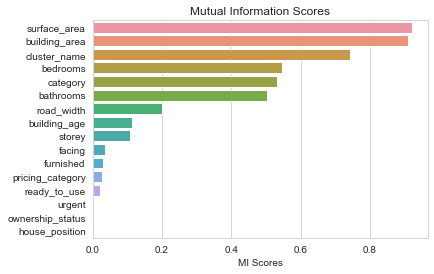

In [42]:
plot_mi_scores(mi_scores)

In [43]:
def drop_uninformative_features(df, mi_score):
    return df.loc[:, mi_score > 0.1]

In [44]:
informative_features = drop_uninformative_features(X, mi_scores)
informative_features.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

  road_width  building_age  category  
0  1-2 Mobil   1 - 4 Tahun   Premium  
1  1-2 Mobil   1 - 4 Tahun  Standard  
2  > 2 Mobil  5 - 10 Tahun  Standard  
3  > 2 Mobil    > 10 Tahun  Standard  
4  > 2 Mobil   1 - 4 Tahun  Standard

In [45]:
new_df = pd.concat([informative_features, y], axis=1)
new_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

  road_width  building_age  category       price  
0  1-2 Mobil   1 - 4 Tahun   Premium  1350000000  
1  1-2 Mobil   1 - 4 Tahun  Standard  1125000000  
2  > 2 Mobil  5 - 10 Tahun  Standard  1999000000  
3  > 2 Mobil    > 10 Tahun  Standard   850000000  
4  > 2 Mobil   1 - 4 Tahun  Standard  1025000000

In [46]:
# to reduce computational divide the price by Rp. 1,000,000
new_df['price'] = new_df['price'].apply(lambda x: x / 1000000)
new_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0    citraland            72             69         2          2       2   
1  bukit palma            60             90         3          2       2   
2  bukit palma           210            100         4          2       1   
3  bukit palma           120             54         3          1       1   
4  bukit palma            60             90         3          2       2   

  road_width  building_age  category   price  
0  1-2 Mobil   1 - 4 Tahun   Premium  1350.0  
1  1-2 Mobil   1 - 4 Tahun  Standard  1125.0  
2  > 2 Mobil  5 - 10 Tahun  Standard  1999.0  
3  > 2 Mobil    > 10 Tahun  Standard   850.0  
4  > 2 Mobil   1 - 4 Tahun  Standard  1025.0

In [47]:
categorical_features = [col for col in new_df.columns if new_df[col].dtype == object]
new_df[categorical_features] = encoder.fit_transform(new_df[categorical_features])
new_df.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  storey  \
0           8.0            72             69         2          2       2   
1           5.0            60             90         3          2       2   
2           5.0           210            100         4          2       1   
3           5.0           120             54         3          1       1   
4           5.0            60             90         3          2       2   

   road_width  building_age  category   price  
0         0.0           0.0       0.0  1350.0  
1         0.0           0.0       2.0  1125.0  
2         2.0           1.0       2.0  1999.0  
3         2.0           2.0       2.0   850.0  
4         2.0           0.0       2.0  1025.0

### Regression

In [48]:
X_reg = new_df.loc[:, new_df.columns != 'price'].values
y_reg = new_df.loc[:, 'price'].values

In [49]:
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_reg, test_size=test_size, random_state=random_state)

In [50]:
X_train_reg_scaled = scaler.fit_transform(X_train_reg)
X_test_reg_scaled = scaler.transform(X_test_reg)

### Classification

In [51]:
X_class = new_df
y_class = pd.Series(encoder.fit_transform(df.loc[:, 'pricing_category'].values.reshape(-1,1)).flatten())

In [52]:
mi_scores = make_mi_scores(X_class, y_class)
print(mi_scores)

bedrooms         0.171126
surface_area     0.101744
building_age     0.097474
cluster_name     0.090365
building_area    0.073532
category         0.055493
road_width       0.037196
price            0.025909
bathrooms        0.003807
storey           0.000000
Name: MI Scores, dtype: float64


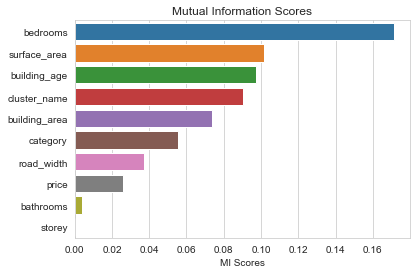

In [53]:
plot_mi_scores(mi_scores)

In [54]:
def drop_uninformative_features(df, mi_score):
    return df.loc[:, mi_score > 0.0]

In [55]:
informative_features = drop_uninformative_features(X_class, mi_scores)
informative_features.head()

cluster_name  surface_area  building_area  bedrooms  bathrooms  road_width  \
0           8.0            72             69         2          2         0.0   
1           5.0            60             90         3          2         0.0   
2           5.0           210            100         4          2         2.0   
3           5.0           120             54         3          1         2.0   
4           5.0            60             90         3          2         2.0   

   building_age  category   price  
0           0.0       0.0  1350.0  
1           0.0       2.0  1125.0  
2           1.0       2.0  1999.0  
3           2.0       2.0   850.0  
4           0.0       2.0  1025.0

In [56]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(informative_features.values, y_class.values, test_size=test_size, random_state=random_state)

In [57]:
X_train_class_scaled = scaler.fit_transform(X_train_class)
X_test_class_scaled = scaler.transform(X_test_class)

# Modeling
---

In [58]:
def grid_search(model, hyperparameter):
    results = GridSearchCV(
        model,
        hyperparameter,
        cv=5,
        verbose=1,
    )
    
    return results

### Regression

In [59]:
model_reg_df = pd.DataFrame(
    columns=['train_mse', 'train_mae', 'test_mse', 'test_mae', 'r2_squared', 'test_rmse'], 
    index=[
        'SVR', 
        'LinearRegression', 
        'KNeighborsRegressor', 
        'RandomForestRegressor', 
        'DecisionTreeRegressor',
    ]
)

In [60]:
# defining base model without hyperparameter tuning (except random_state)
svr = SVR()
linear = LinearRegression()
knn_r = KNeighborsRegressor()
random_r = RandomForestRegressor(random_state=random_state)
decision_r = DecisionTreeRegressor(random_state=random_state)

##### SVR

In [61]:
support_hyperparameter = {
    'C': [1e-2, 1e-1, 1, 10, 100],
    'degree': [3, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5],
    'gamma': ['scale', 'auto'],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
}

svr_search = grid_search(svr, support_hyperparameter)
svr_search.fit(X_train_reg_scaled, y_train_reg)
print('Best hyperparameter for SVR:', svr_search.best_params_)

svr = SVR(C=100, gamma='scale', tol=0.0001)
svr.fit(X_train_reg_scaled, y_train_reg)
yhat_svr = svr.predict(X_test_reg_scaled)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best hyperparameter for SVR: {'C': 100, 'degree': 3, 'gamma': 'scale', 'tol': 0.0001}


##### LinearRegression

In [62]:
linear.fit(X_train_reg_scaled, y_train_reg)
yhat_linear = linear.predict(X_test_reg_scaled)

##### KNeighborsRegressor

In [63]:
knn_hyperparameter = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

knn_r_search = grid_search(knn_r, knn_hyperparameter)
knn_r_search.fit(X_train_reg_scaled, y_train_reg)
print('Best hyperparameter for KNeighborsRegressor:', knn_r_search.best_params_)

knn_r = KNeighborsRegressor(n_neighbors=3)
knn_r.fit(X_train_reg_scaled, y_train_reg)
yhat_knn = knn_r.predict(X_test_reg_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameter for KNeighborsRegressor: {'n_neighbors': 3}


##### RandomForestRegressor

In [64]:
random_hyperparameter = {
    'n_estimators': [10, 100, 200, 500, 1000],
    'criterion': ['squared_error', 'absolute_error', 'poisson']
}

random_search = grid_search(random_r, random_hyperparameter)
random_search.fit(X_train_reg_scaled, y_train_reg)
print('Best hyperparameter for RandomForestRegressor:', random_search.best_params_)

random_r = RandomForestRegressor(n_estimators=200, criterion='poisson', random_state=random_state)
random_r.fit(X_train_reg_scaled, y_train_reg)
yhat_random_r = random_r.predict(X_test_reg_scaled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best hyperparameter for RandomForestRegressor: {'criterion': 'poisson', 'n_estimators': 200}


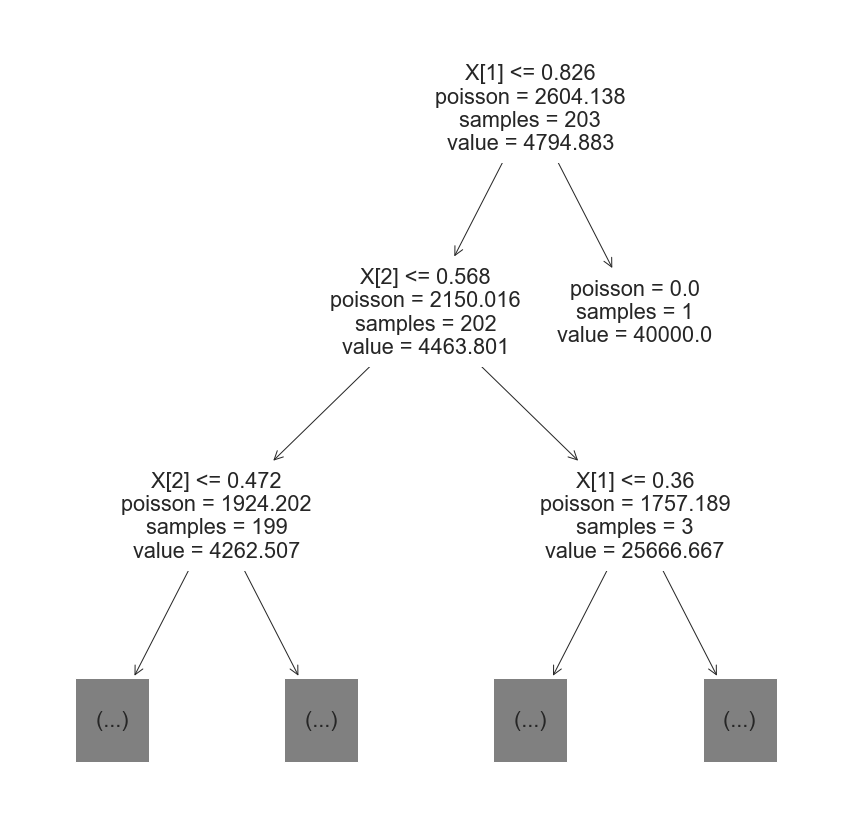

In [65]:
plt.figure(figsize=(15,15))
plot_tree(random_r.estimators_[1], max_depth=2)
plt.show()

##### DecisionTreeRegressor

In [66]:
decision_hyperparameter = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse', 'poisson'],
    'splitter': ['best', 'random']
}

decision_search = grid_search(decision_r, decision_hyperparameter)
decision_search.fit(X_train_reg_scaled, y_train_reg)
print('Best hyperparameter for DecisionTreeRegressor:', decision_search.best_params_)

decision_r = DecisionTreeRegressor(splitter='best', criterion='absolute_error', random_state=random_state)
decision_r.fit(X_train_reg_scaled, y_train_reg)
yhat_decision_r = decision_r.predict(X_test_reg_scaled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best hyperparameter for DecisionTreeRegressor: {'criterion': 'absolute_error', 'splitter': 'best'}


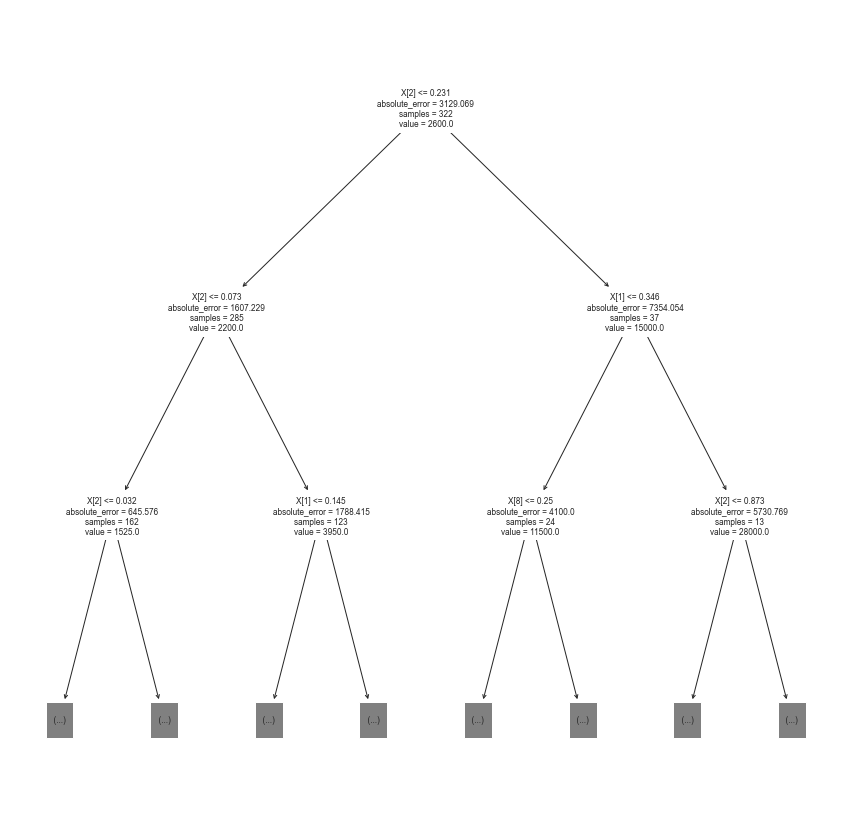

In [67]:
plt.figure(figsize=(15,15))
plot_tree(decision_r, max_depth=2)
plt.show()

### Evaluation

In [68]:
model_reg = {
    'SVR': svr,
    'LinearRegression': linear,
    'KNeighborsRegressor': knn_r,
    'RandomForestRegressor': random_r,
    'DecisionTreeRegressor': decision_r
}

In [69]:
for name, model in model_reg.items():
    model_reg_df.loc[name, 'train_mse'] = mean_squared_error(y_train_reg, model.predict(X_train_reg_scaled))
    model_reg_df.loc[name, 'train_mae'] = mean_absolute_error(y_train_reg, model.predict(X_train_reg_scaled))
    model_reg_df.loc[name, 'test_mse'] = mean_squared_error(y_test_reg, model.predict(X_test_reg_scaled))
    model_reg_df.loc[name, 'test_mae'] = mean_absolute_error(y_test_reg, model.predict(X_test_reg_scaled))
    model_reg_df.loc[name, 'r2_squared'] = r2_score(y_test_reg, model.predict(X_test_reg_scaled))
    model_reg_df.loc[name, 'test_rmse'] = mean_squared_error(y_test_reg, model.predict(X_test_reg_scaled), squared=False)
    r2_score
model_reg_df

train_mse    train_mae         test_mse  \
SVR                    34329944.86627  2443.933217  62561796.113961   
LinearRegression       4567500.623757  1334.981837   17415085.19268   
KNeighborsRegressor    4114251.810165   872.166294  30151039.033161   
RandomForestRegressor   886153.715085   468.265767  18860823.192787   
DecisionTreeRegressor     1327.156723     4.518634  15016115.850648   

                          test_mae r2_squared    test_rmse  
SVR                    2774.178233   0.072856  7909.601514  
LinearRegression       1648.712883   0.741915   4173.13853  
KNeighborsRegressor    1619.083663   0.553172  5490.996179  
RandomForestRegressor  1634.036793   0.720489  4342.904926  
DecisionTreeRegressor  1500.883333   0.777467  3875.063335

In [70]:
model_reg_df.sort_values(['test_mse', 'test_mae'])

train_mse    train_mae         test_mse  \
DecisionTreeRegressor     1327.156723     4.518634  15016115.850648   
LinearRegression       4567500.623757  1334.981837   17415085.19268   
RandomForestRegressor   886153.715085   468.265767  18860823.192787   
KNeighborsRegressor    4114251.810165   872.166294  30151039.033161   
SVR                    34329944.86627  2443.933217  62561796.113961   

                          test_mae r2_squared    test_rmse  
DecisionTreeRegressor  1500.883333   0.777467  3875.063335  
LinearRegression       1648.712883   0.741915   4173.13853  
RandomForestRegressor  1634.036793   0.720489  4342.904926  
KNeighborsRegressor    1619.083663   0.553172  5490.996179  
SVR                    2774.178233   0.072856  7909.601514

### Classification

In [71]:
model_class_df = pd.DataFrame(
    columns=['accuracy', 'precision', 'recall', 'f1-score'], 
    index=[
        'SVC', 
        'KNeighborsClassifier', 
        'RandomForestClassifier', 
        'DecisionTreeClassifier', 
        'GaussianNB',
    ]
)

In [72]:
# defining base model without hyperparameter tuning (except random_state)
svc = SVC(random_state=random_state)
knn = KNeighborsClassifier()
random_c = RandomForestClassifier(random_state=random_state)
decision_c = DecisionTreeClassifier(random_state=random_state)
gaussian = GaussianNB()

##### SVC

In [73]:
support_hyperparameter = {
    'C': [1e-2, 1e-1, 1, 10, 100],
    'degree': [3, 3e-1, 3e-2, 3e-3, 3e-4, 3e-5],
    'gamma': ['scale', 'auto'],
    'tol': [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
}

svc_search = grid_search(svc, support_hyperparameter)
svc_search.fit(X_train_class_scaled, y_train_class)
print('Best hyperparameter for SVC:', svc_search.best_params_)

svc = SVC(C=10, tol=0.1, random_state=random_state)
svc.fit(X_train_class_scaled, y_train_class)
yhat_svc = svc.predict(X_test_class_scaled)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
Best hyperparameter for SVC: {'C': 10, 'degree': 3, 'gamma': 'scale', 'tol': 0.1}


<AxesSubplot:>

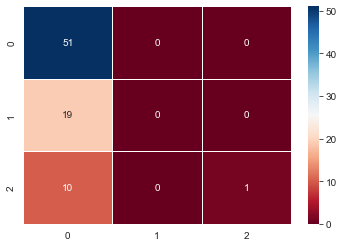

In [74]:
cm = confusion_matrix(y_test_class, yhat_svc)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdBu')

In [75]:
print('Accuracy of SVC model:', svc.score(X_test_class_scaled, y_test_class))

Accuracy of SVC model: 0.6419753086419753


##### KNeighborsClassifier

In [76]:
knn_hyperparameter = {
    'n_neighbors': [1, 3, 5, 7, 9, 11]
}

knn_search = grid_search(knn, knn_hyperparameter)
knn_search.fit(X_train_class_scaled, y_train_class)
print('Best hyperparameter for KNeighborsClassifier:', knn_search.best_params_)

knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_class_scaled, y_train_class)
yhat_knn = knn.predict(X_test_class_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameter for KNeighborsClassifier: {'n_neighbors': 11}


<AxesSubplot:>

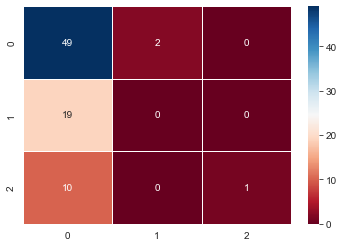

In [77]:
cm = confusion_matrix(y_test_class, yhat_knn)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdBu')

In [78]:
print('Accuracy of KNeighborsClassifier model:', knn.score(X_test_class_scaled, y_test_class))

Accuracy of KNeighborsClassifier model: 0.6172839506172839


##### RandomForestClassifier

In [79]:
random_hyperparameter = {
    'n_estimators': [10, 100, 200, 500, 1000],
    'criterion': ['gini', 'entropy', 'log_loss']
}

random_search = grid_search(random_c, random_hyperparameter)
random_search.fit(X_train_class_scaled, y_train_class)
print('Best hyperparameter for RandomForestClassifier:', random_search.best_params_)

random_c = RandomForestClassifier(n_estimators=200, random_state=random_state)
random_c.fit(X_train_class_scaled, y_train_class)
yhat_random_c = random_c.predict(X_test_class_scaled)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


25 fits failed out of a total of 75.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\micha\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\micha\anaconda3\lib\site-packages\j

Best hyperparameter for RandomForestClassifier: {'criterion': 'gini', 'n_estimators': 200}


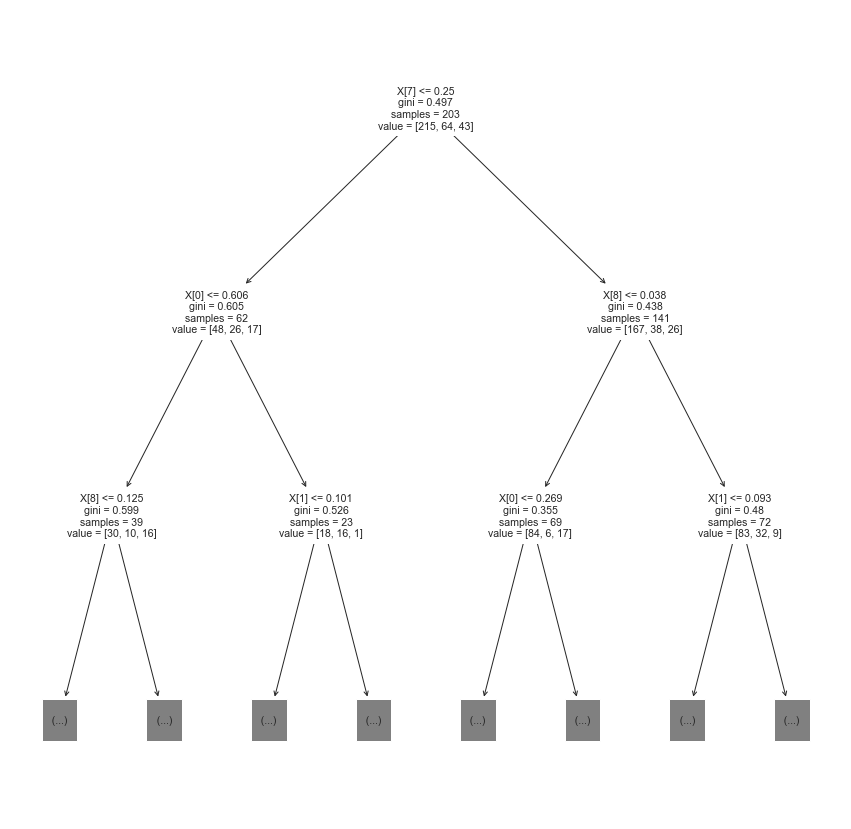

In [80]:
plt.figure(figsize=(15,15))
plot_tree(random_c.estimators_[1], max_depth=2)
plt.show()

<AxesSubplot:>

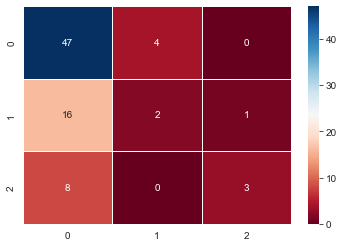

In [81]:
cm = confusion_matrix(y_test_class, yhat_random_c)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdBu')

In [82]:
print('Accuracy of RandomForestClassifier model:', random_c.score(X_test_class_scaled, y_test_class))

Accuracy of RandomForestClassifier model: 0.6419753086419753


##### DecisionTreeClassifier

In [83]:
decision_hyperparameter = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random']
}

decision_c_search = grid_search(decision_c, decision_hyperparameter)
decision_c_search.fit(X_train_class_scaled, y_train_class)
print('Best hyperparameter for DecisionTreeClassifier:', decision_c_search.best_params_)

decision_c = DecisionTreeClassifier(splitter='random', random_state=random_state)
decision_c.fit(X_train_class_scaled, y_train_class)
yhat_decision_c = decision_c.predict(X_test_class_scaled)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best hyperparameter for DecisionTreeClassifier: {'criterion': 'gini', 'splitter': 'random'}


C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\micha\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 352, in fit
    criterion = CRITERIA_CLF[self.criterion](
KeyError: 'log_loss'


C:\Users\micha\anaconda3\lib\site

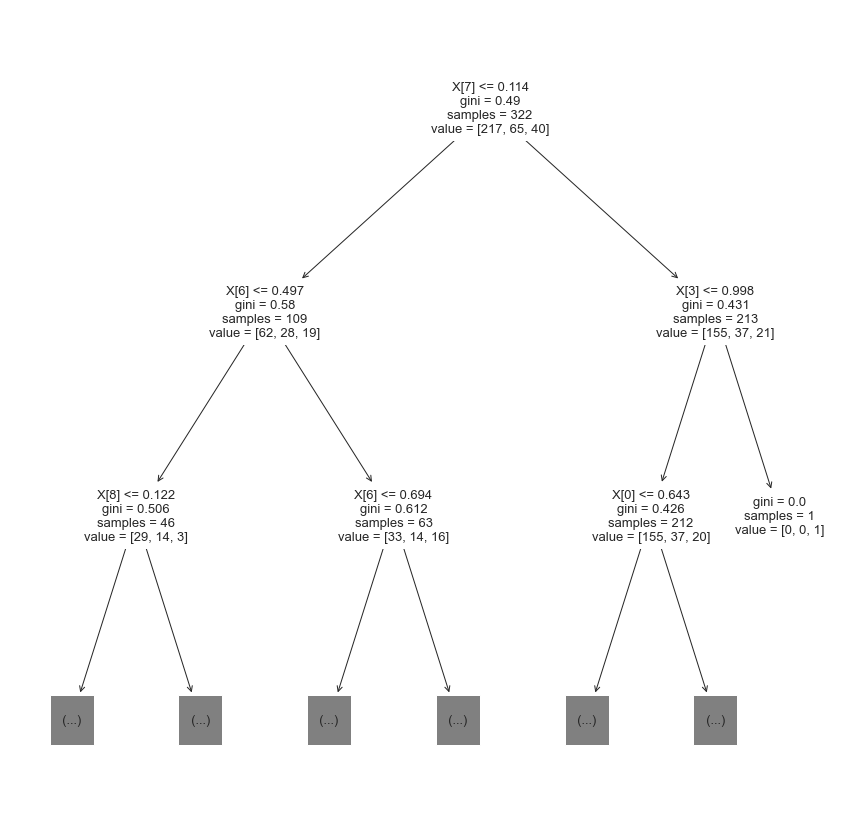

In [84]:
plt.figure(figsize=(15,15))
plot_tree(decision_c, max_depth=2)
plt.show()

<AxesSubplot:>

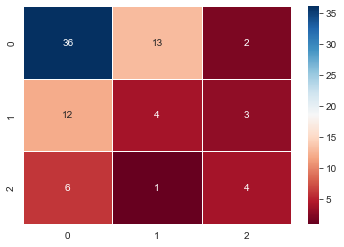

In [85]:
cm = confusion_matrix(y_test_class, yhat_decision_c)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdBu')

In [86]:
print('Accuracy of DecisionTreeClassifier model:', decision_c.score(X_test_class_scaled, y_test_class))

Accuracy of DecisionTreeClassifier model: 0.5432098765432098


##### GaussianNB

In [87]:
gaussian.fit(X_train_class_scaled, y_train_class)
yhat_gaussian = gaussian.predict(X_test_class_scaled)

<AxesSubplot:>

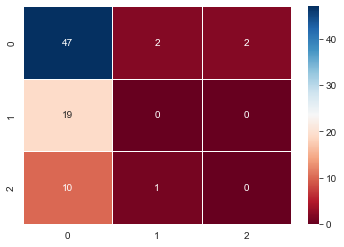

In [88]:
cm = confusion_matrix(y_test_class, yhat_gaussian)
sns.heatmap(cm, annot=True, linewidth=1, cmap='RdBu')

In [89]:
print('Accuracy of GaussianNB model:', gaussian.score(X_test_class_scaled, y_test_class))

Accuracy of GaussianNB model: 0.5802469135802469


### Evaluation

In [90]:
model_class = {
    'SVC': svc,
    'KNeighborsClassifier': knn,
    'RandomForestClassifier': random_c,
    'DecisionTreeClassifier': decision_c,
    'GaussianNB': gaussian
}

In [91]:
for name, model in model_class.items():
    model_class_df.loc[name, 'accuracy'] = accuracy_score(y_test_class, model.predict(X_test_class))
    model_class_df.loc[name, 'precision'] = precision_score(y_test_class, model.predict(X_test_class), average='micro')
    model_class_df.loc[name, 'recall'] = recall_score(y_test_class, model.predict(X_test_class), average='micro')
    model_class_df.loc[name, 'f1-score'] = f1_score(y_test_class, model.predict(X_test_class), average='micro')
model_class_df

accuracy precision    recall  f1-score
SVC                      0.62963   0.62963   0.62963   0.62963
KNeighborsClassifier     0.62963   0.62963   0.62963   0.62963
RandomForestClassifier  0.197531  0.197531  0.197531  0.197531
DecisionTreeClassifier  0.209877  0.209877  0.209877  0.209877
GaussianNB              0.234568  0.234568  0.234568  0.234568

In [92]:
model_class_df.sort_values('f1-score', ascending=False)

accuracy precision    recall  f1-score
SVC                      0.62963   0.62963   0.62963   0.62963
KNeighborsClassifier     0.62963   0.62963   0.62963   0.62963
GaussianNB              0.234568  0.234568  0.234568  0.234568
DecisionTreeClassifier  0.209877  0.209877  0.209877  0.209877
RandomForestClassifier  0.197531  0.197531  0.197531  0.197531

<AxesSubplot:>

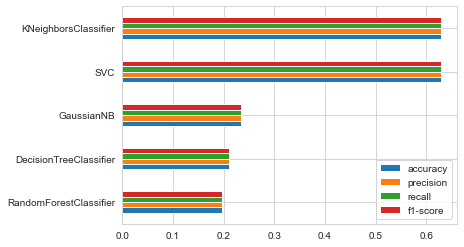

In [93]:
model_class_df.sort_values('f1-score').plot.barh()